In [8]:
pip install pygame
# first select start node, then end node
# draw several paths for travelling 
# press SPACE
# starts running ----------
# after completing press SPACE again

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pygame

WIDTH = 700
WIN = pygame.display.set_mode((WIDTH, WIDTH))
pygame.display.set_caption('Shortest path auto driving')
car = pygame.image.load('car.png')
car = pygame.transform.scale(car, (50, 70))
car_x = -50
car_y = -50

RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
ORANGE = (255, 165, 0)
TURQUOISE = (64, 224, 208)
PURPLE = (128, 0, 128)
YELLOW = (102, 102, 0)
MAGENTA = (0, 102, 102)


class Node:
    def __init__(self, row, col, width, total_rows):
        self.row = row
        self.col = col
        self.x = row * width
        self.y = col * width
        self.width = width
        self.color = WHITE
        self.neighbour = []
        self.total_rows = total_rows

    def get_pos(self):
        return self.row, self.col

    def make_start(self):
        self.color = GREEN

    def make_end(self):
        self.color = RED

    def reset(self):
        self.color = WHITE

    def make_road(self):
        self.color = BLACK

    def make_path(self):
        self.color = BLUE

    def make_visited(self):
        self.color = MAGENTA

    def make_line(self):
        self.color = ORANGE

    def is_start(self):
        return self.color == GREEN

    def is_end(self):
        return self.color == RED

    def is_road(self):
        return self.color == BLACK

    def is_visited(self):
        return self.color == MAGENTA

    def is_path(self):
        return self.color == BLUE

    def update_neighbors(self, grid):
        if self.row < self.total_rows - 1 and (grid[self.row + 1][self.col].is_road() or grid[self.row + 1][self.col].is_end()):
            self.neighbour.append(grid[self.row + 1][self.col])
        if self.row > 0 and (grid[self.row - 1][self.col].is_road() or grid[self.row - 1][self.col].is_end()):
            self.neighbour.append(grid[self.row - 1][self.col])
        if self.col < self.total_rows - 1 and (grid[self.row][self.col + 1].is_road() or grid[self.row][self.col + 1].is_end()):
            self.neighbour.append(grid[self.row][self.col + 1])
        if self.col > 0 and (grid[self.row][self.col - 1].is_road() or grid[self.row][self.col - 1].is_end()):
            self.neighbour.append(grid[self.row][self.col - 1])

    def draw(self, win):
        pygame.draw.rect(win, self.color, (self.x, self.y, self.width, self.width))

    def __lt__(self, other):
        return False


def make_grid(rows, width):
    grid = []
    gap = width // rows
    for i in range(rows):
        grid.append([])
        for j in range(rows):
            grid[i].append(Node(i, j, gap, rows))

    return grid


def draw_line(win,  rows, width):
    gap = width // rows
    for i in range(rows):
        pygame.draw.line(win, BLACK, (0, i * gap), (width, i * gap))
        pygame.draw.line(win, BLACK, (i * gap, 0), (i * gap, width))


def draw(win, grid, rows, width):
    for row in grid:
        for node in row:
            node.draw(win)

    draw_line(win, rows, width)
    pygame.display.update()


def get_clicked_pos(pos, rows, width):
    gap = width//rows
    x, y = pos
    return x // gap, y // gap


def algorithm(grid, start, end):
    q = [start]
    vis = []
    path = {}
    clock = pygame.time.Clock()
    for i in range(100):
        vis.append([])
        for j in range(100):
            vis[i].append(False)
    while len(q) and q[0] != end:
        top = q.pop(0)
        if top == end:
            return 0
        if top != end and top != start:
            top.make_visited()
        for i in top.neighbour:
            if not vis[i.row][i.col]:
                path[i] = top
                q.append(i)
                if i != end:
                    grid[i.row][i.col].make_path()
                    vis[i.row][i.col] = True
                    clock.tick(20)
                    draw(WIN, grid, i.total_rows, i.width)
    key = end
    while key != start:
        if path[key] != start:
            path[key].make_line()
        key = path[key]
        draw(WIN, grid, i.total_rows, i.width)

    for i in range(0, len(grid)):
        for j in range(0, len(grid[i])):
            if grid[i][j].is_path() or grid[i][j].is_visited():
                grid[i][j].make_road()
                draw(WIN, grid, grid[i][j].total_rows, grid[i][j].width)


def steer(win, vard, car_x, car_y):
    left_px = BLUE
    up_px = BLUE
    down_px = BLUE
    right_px = BLUE
    if car_x + 25 < WIDTH and car_y - 30 > 0:
        up_px = win.get_at((car_x + 25, car_y - 30))[0:3]
    if car_x + 25 < 900 and car_y + 80 < WIDTH:
        down_px = win.get_at((car_x + 25, car_y + 80))[0:3]
    if car_x + 80 < WIDTH and car_y + 30 < WIDTH:
        right_px = win.get_at((car_x + 80, car_y + 40))[0:3]
    if car_x - 40 > 0 and car_y + 40 < WIDTH:
        left_px = win.get_at((car_x - 40, car_y + 40))[0:3]

    print('up pixel: ', up_px)
    print('down pixel: ', down_px)
    print('right pixel: ', right_px)
    print('left pixel: ', left_px)
    #pygame.draw.circle(win, (0, 0, 225), (car_x + 25, car_y - 50), 5, 5)
    #pygame.draw.circle(win, (0, 0, 225), (car_x + 25, car_y + 60), 5, 5)
    #pygame.draw.circle(win, (0, 0, 225), (car_x + 100, car_y + 40), 5, 5)
    #pygame.draw.circle(win, (0, 0, 225), (car_x - 60, car_y + 40), 5, 5)

    if vard == 'up':
        if up_px == ORANGE or up_px == RED:
            return 0, vard
        elif right_px == ORANGE or right_px == RED:
            return -90, 'right'
        elif left_px == ORANGE or left_px == RED:
            return 90, 'left'
    elif vard == 'right':
        if right_px == ORANGE or right_px == RED:
            return 0, 'right'
        elif (up_px == ORANGE or up_px == RED) and (right_px != ORANGE and right_px != RED):
            return 90, 'up'
        elif down_px == ORANGE or down_px == RED:
            return -90, 'down'
    elif vard == 'left':
        if left_px == ORANGE or left_px == RED:
            return 0, 'left'
        elif (up_px == ORANGE or up_px == RED) and (left_px != ORANGE or left_px != RED):
            return -90, 'up'
        elif down_px == ORANGE or down_px == RED:
            return 90, 'down'
    elif vard == 'down':
        if down_px == ORANGE or down_px == RED:
            return 0, 'down'
        elif right_px == ORANGE or right_px == RED:
            return 90, 'right'
        elif left_px == ORANGE or left_px == RED:
            return -90, 'left'

    elif down_px == ORANGE or down_px == RED:
        return 180, 'down'

    return 0, 'stop'


def drive(win, grid, dir, car, car_x, car_y):
    clock = pygame.time.Clock()
    while True:
        clock.tick(60)
        turn, dir = steer(win, dir, car_x, car_y)
        prev_x = car_x
        prev_y = car_y
        car = pygame.transform.rotate(car, turn)
        if dir == 'up':
            car_y -= 1
        elif dir == 'right':
            car_x += 1
        elif dir == 'left':
            car_x -= 1
        elif dir == 'down':
            car_y += 1
        print('steer: ', dir)
        if dir == 'stop':
            for event in pygame.event.get():
                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_SPACE:
                        pygame.quit()
        win.blit(car, (prev_x, prev_y))
        pygame.display.update()


def main(win, width, car_x, car_y):
    rows = 10
    grid = make_grid(rows, width)

    start = None
    end = None
    run = True

    while run:
        draw(win, grid, rows, width)
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False

            if pygame.mouse.get_pressed()[0]:
                pos = pygame.mouse.get_pos()
                row, col = get_clicked_pos(pos, rows, width)
                spot = grid[row][col]

                if not start and spot != end:
                    start = spot
                    start.make_start()
                    car_x, car_y = spot.get_pos()
                    car_x *= spot.width
                    car_x += ((spot.width - 50) // 2)
                    car_y *= spot.width
                    car_y += ((spot.width - 70) // 2)

                elif not end and spot != start:
                    end = spot
                    end.make_end()

                elif spot != start and spot != end:
                    spot.make_road()

            elif pygame.mouse.get_pressed()[2]:
                pos = pygame.mouse.get_pos()
                row, col = get_clicked_pos(pos, rows, width)
                spot = grid[row][col]
                spot.reset()
                if spot == start:
                    start = None
                elif spot == end:
                    end = None

            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_SPACE:
                    for row in grid:
                        for spot in row:
                            spot.update_neighbors(grid)
                    algorithm(grid, start, end)
                    run = False

    run = False
    return car_x, car_y, grid


if __name__ == "__main__":
    car_x, car_y, grid= main(WIN, WIDTH, car_x, car_y)
    dir = 'up'
    drive(WIN, grid, dir, car, car_x, car_y)
    pygame.quit()

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
up pixel:  (0, 0, 0)
down pixel:  (0, 0, 0)
right pixel:  (255, 165, 0)
left pixel:  (0, 0, 0)
steer:  right
up pixel:  (0, 0, 0)
down pixel:  (0, 0, 0)
right pixel:  (255, 165, 0)
left pixel:  (0, 0, 0)
steer:  right
up pixel:  (0, 0, 0)
down pixel:  (0, 0, 0)
right pixel:  (255, 165, 0)
left pixel:  (0, 0, 0)
steer:  right
up pixel:  (0, 0, 0)
down pixel:  (0, 0, 0)
right pixel:  (255, 165, 0)
left pixel:  (0, 0, 0)
steer:  right
up pixel:  (0, 0, 0)
down pixel:  (0, 0, 0)
right pixel:  (255, 165, 0)
left pixel:  (0, 0, 0)
steer:  right
up pixel:  (0, 0, 0)
down pixel:  (0, 0, 0)
right pixel:  (255, 165, 0)
left pixel:  (0, 0, 0)
steer:  right
up pixel:  (0, 0, 0)
down pixel:  (0, 0, 0)
right pixel:  (255, 165, 0)
left pixel:  (0, 0, 0)
steer:  right
up pixel:  (0, 0, 0)
down pixel:  (0, 0, 0)
right pixel:  (255, 165, 0)
left pixel:  (0, 0, 0)
steer:  right
up pixel:  (0, 0

error: display Surface quit

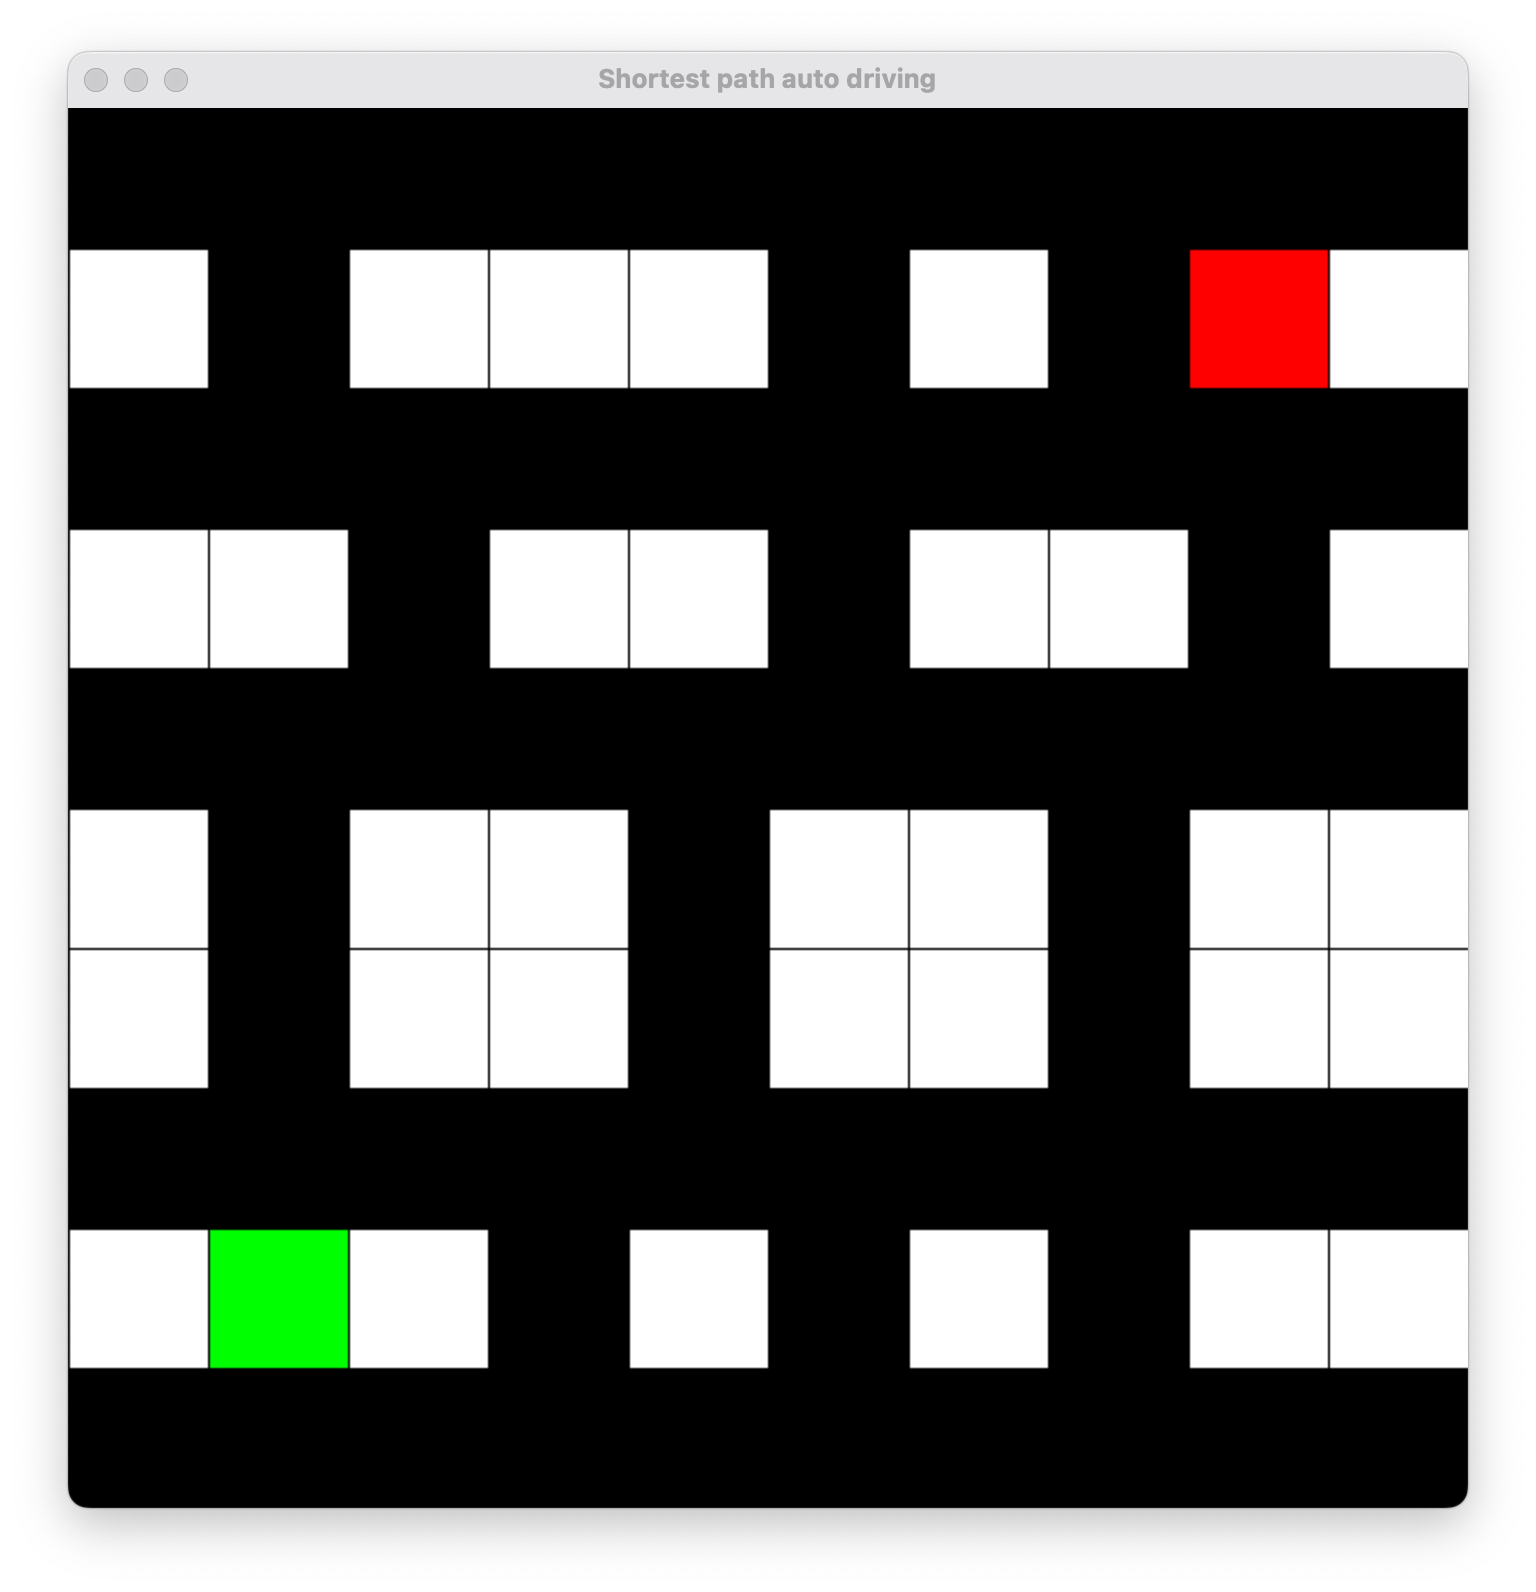

In [2]:
from PIL import Image
img= Image.open ('01.png')
img

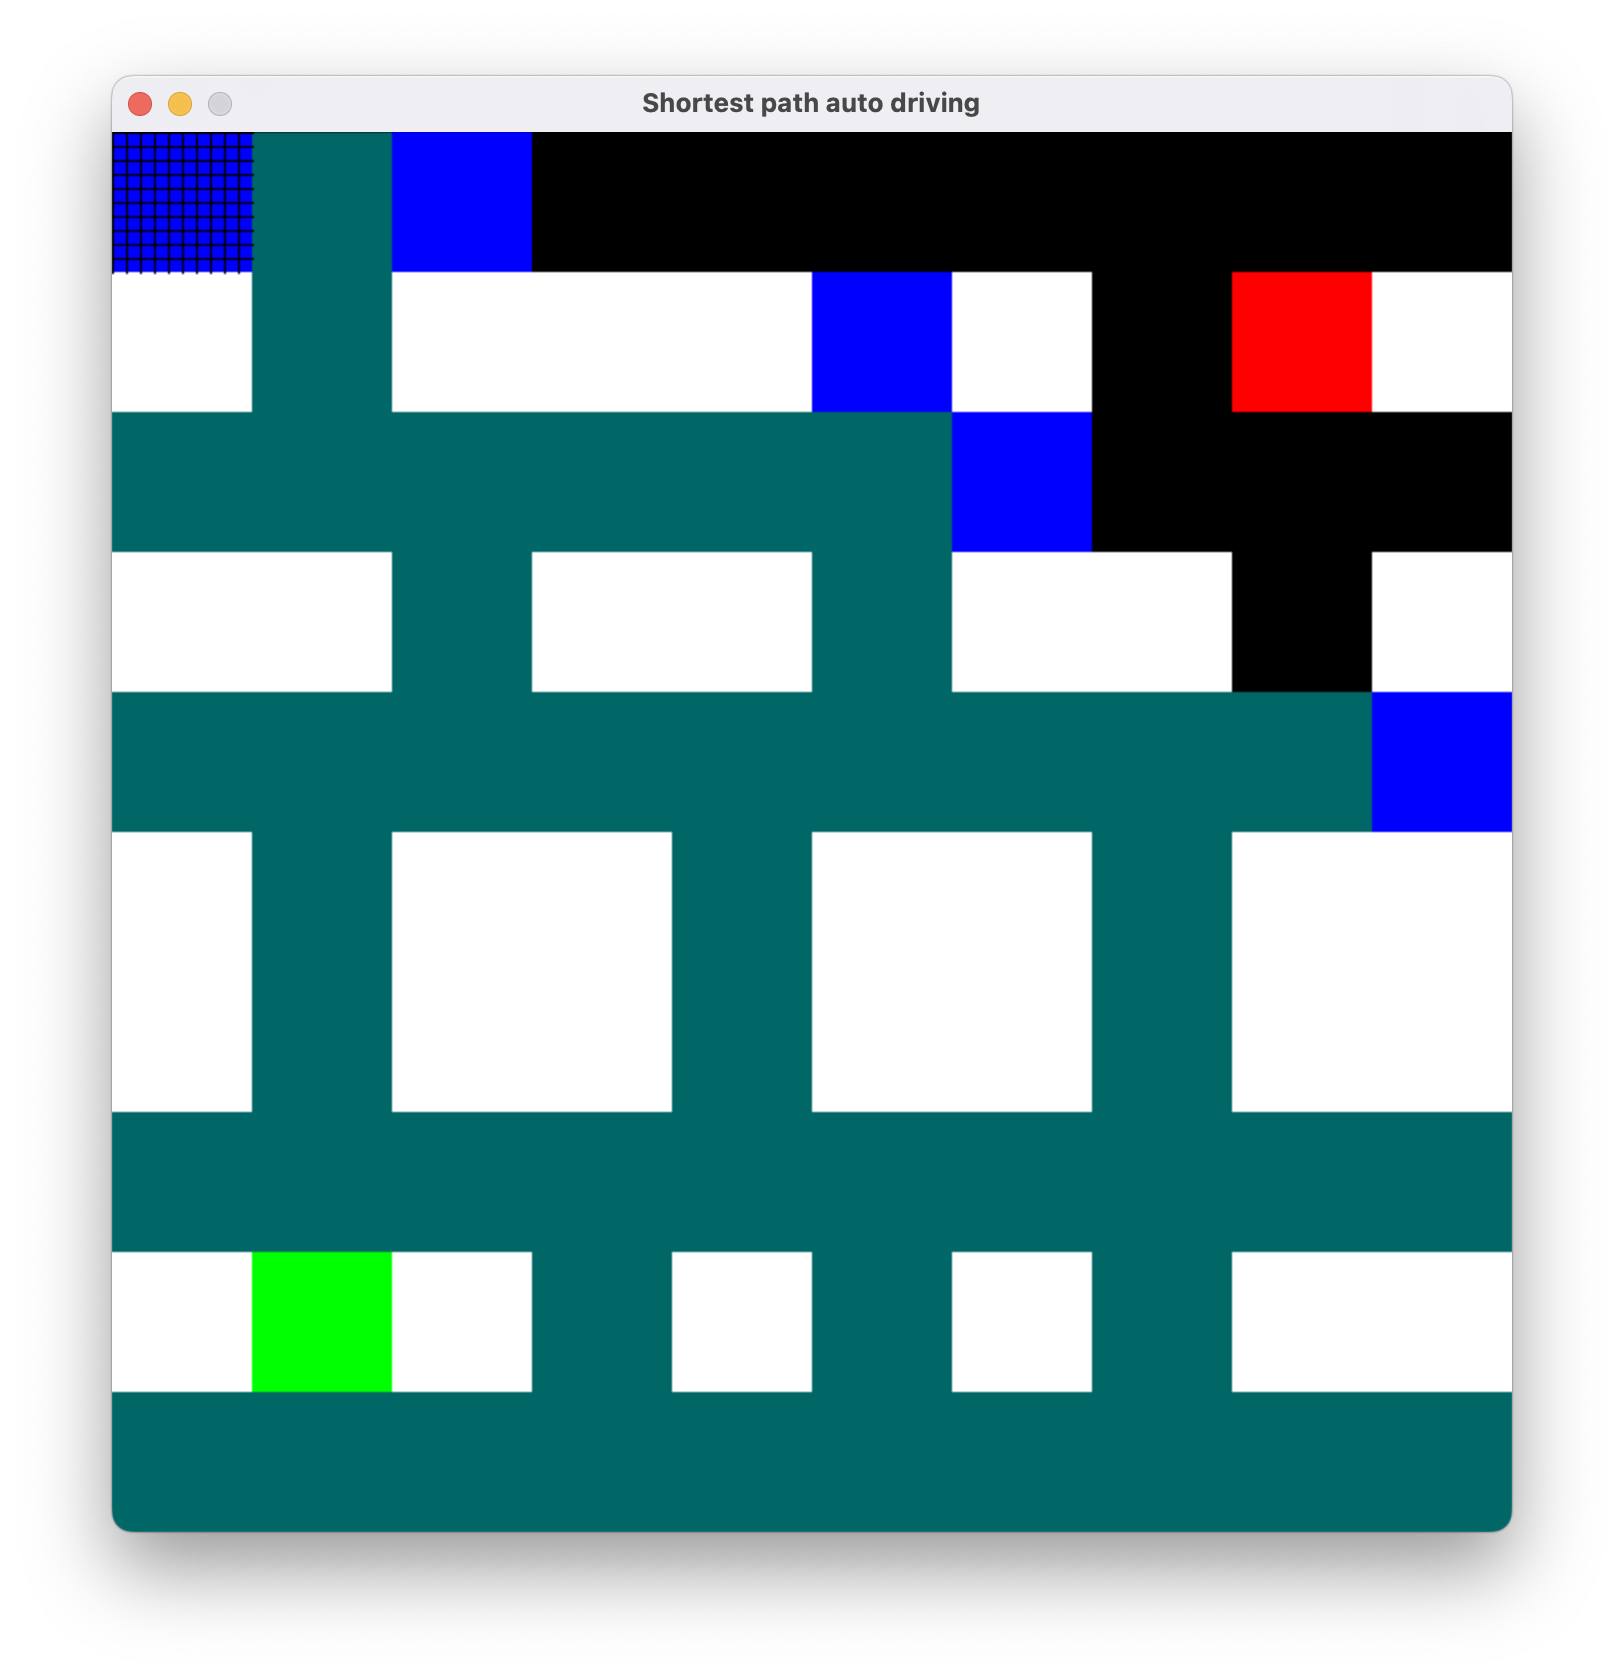

In [4]:
from PIL import Image
img= Image.open ('02.png')
img

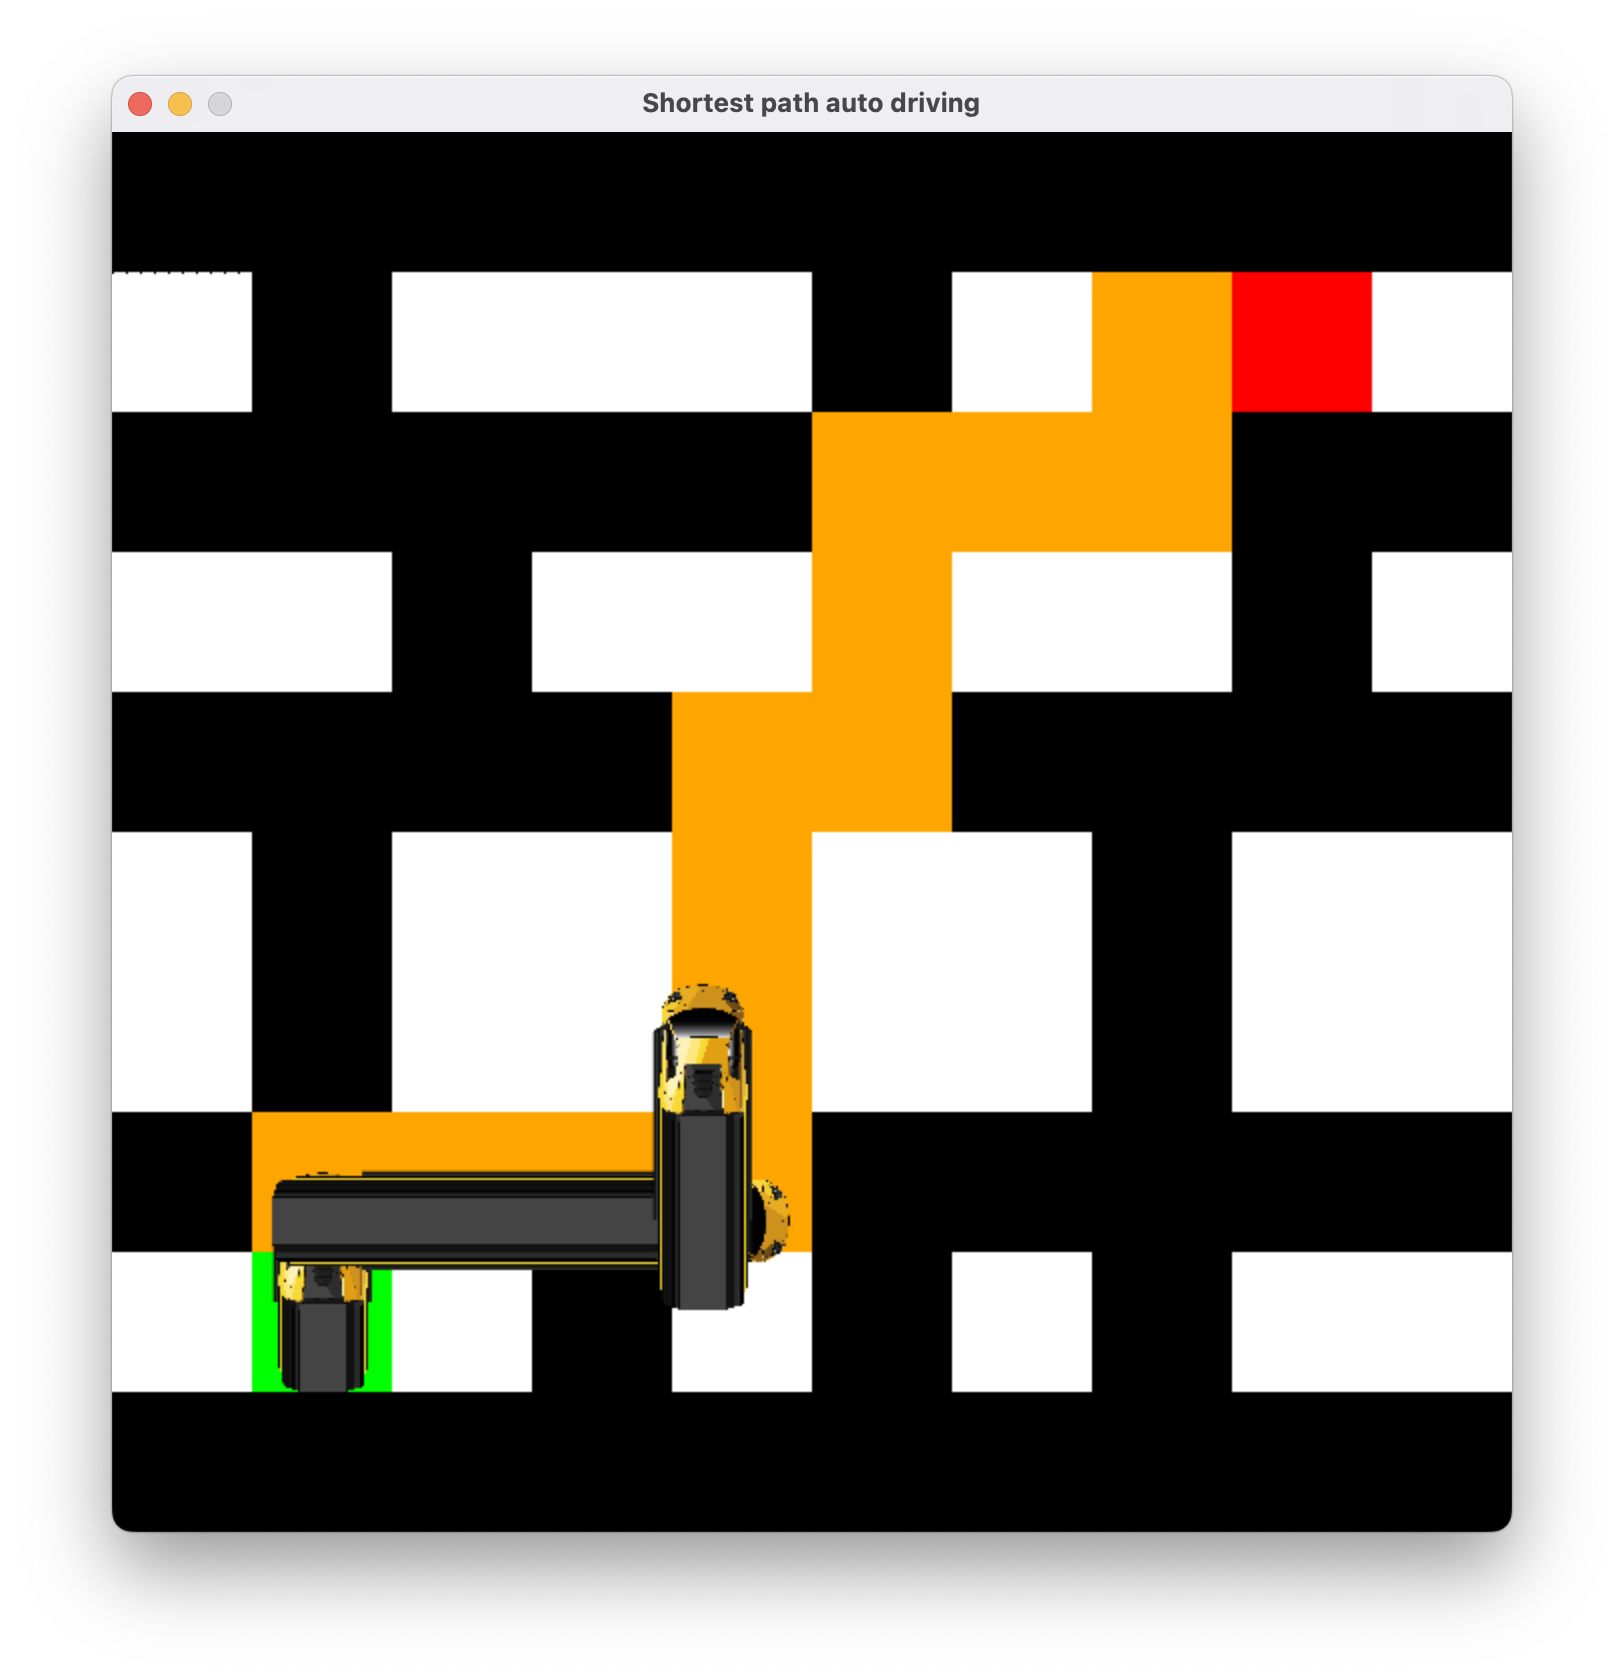

In [5]:
from PIL import Image
img= Image.open ('03.png')
img

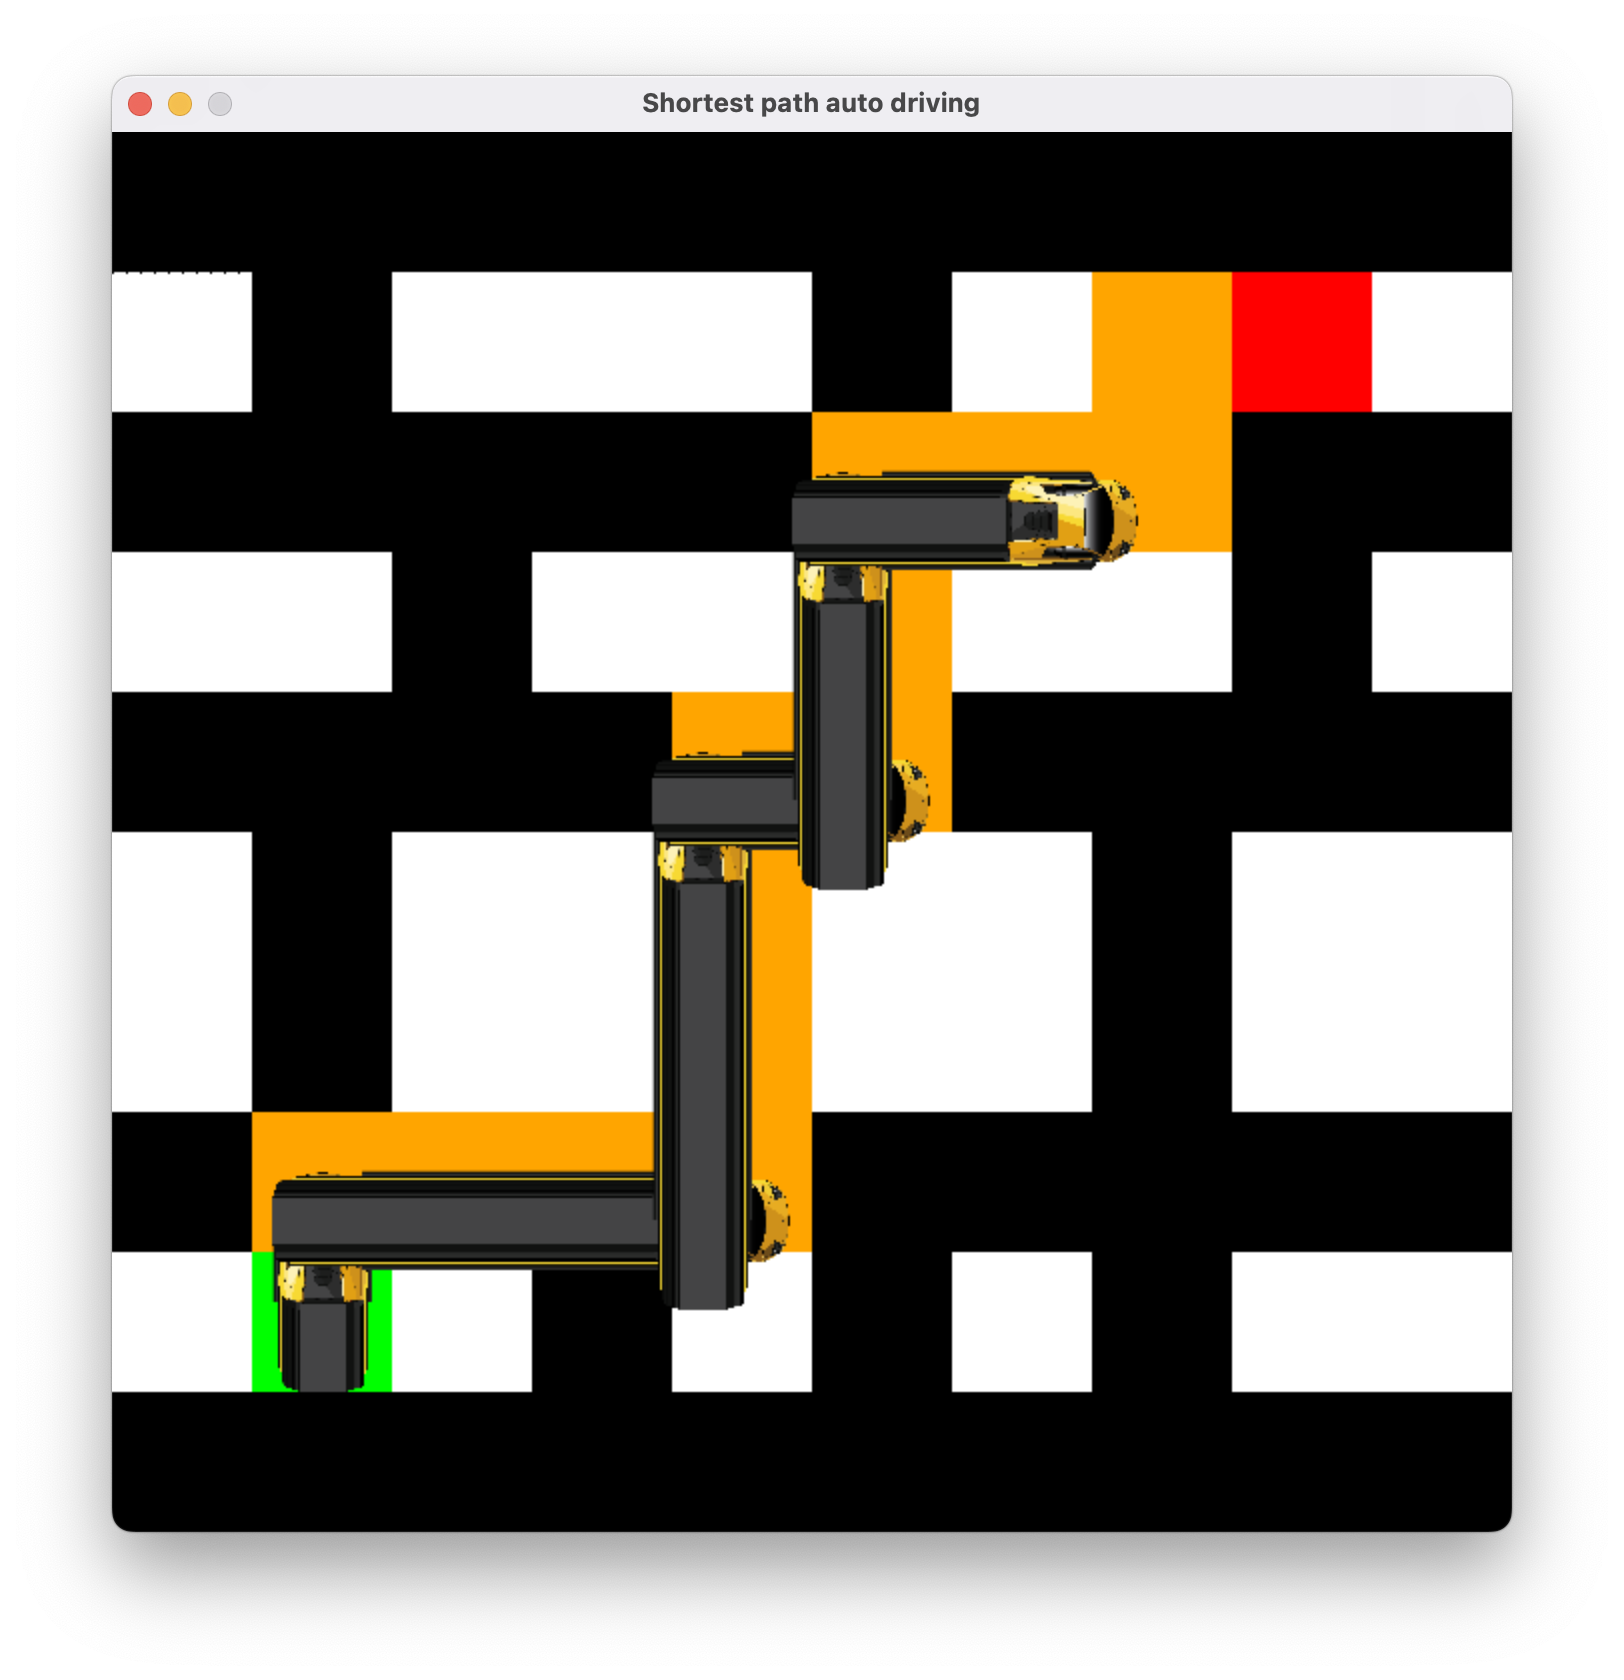

In [6]:
from PIL import Image
img= Image.open ('04.png')
img

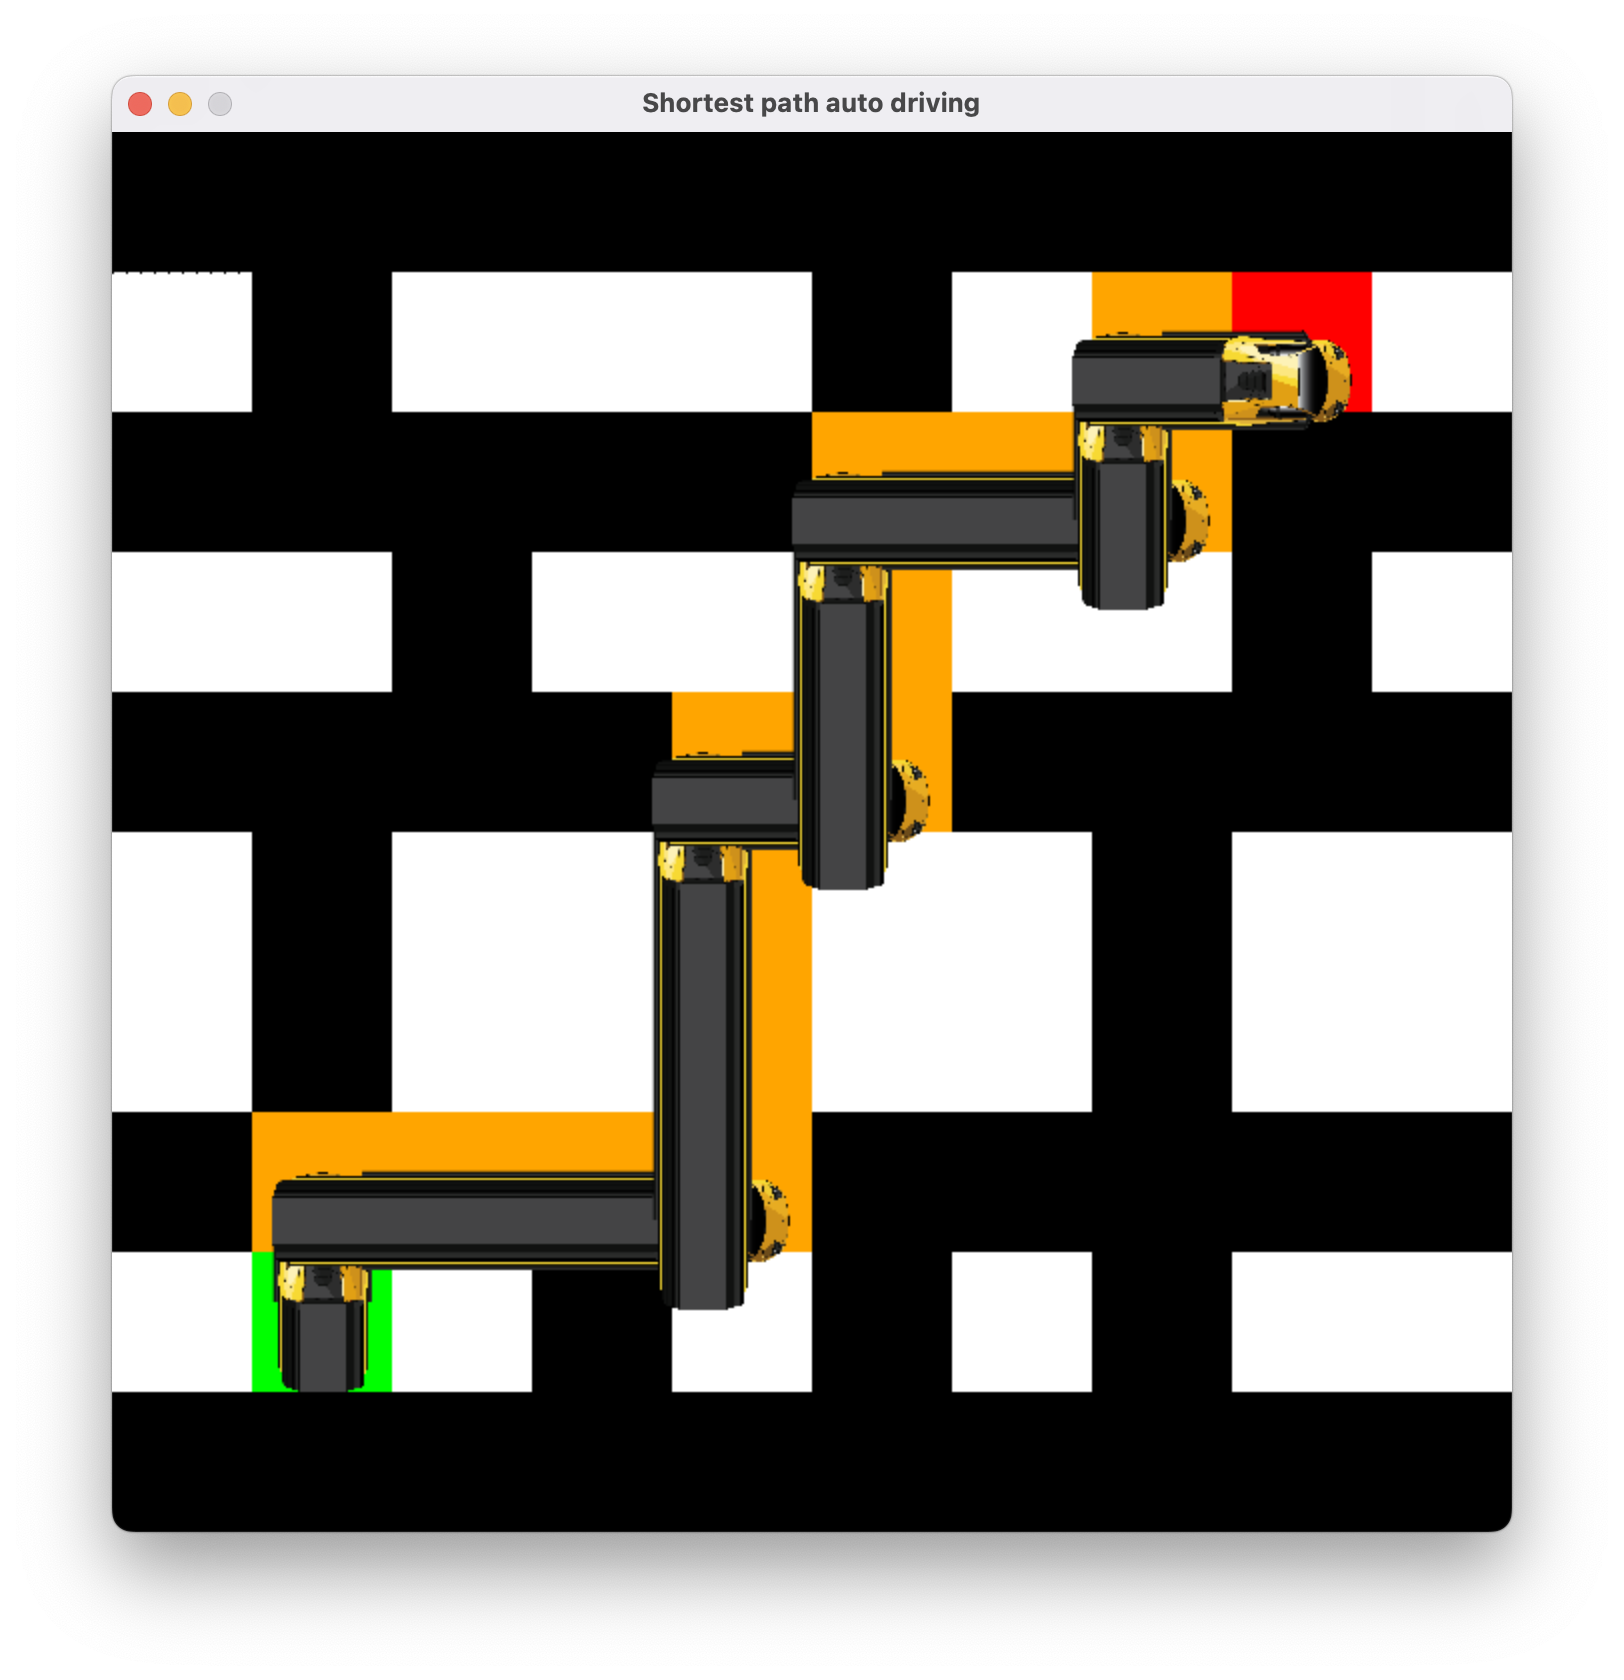

In [7]:
from PIL import Image
img= Image.open ('05.png')
img